<div style="background-color: #4b3832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: cyan; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Data Analysis of Fatalities of Isreal and Palestine
</h1>
</div>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')

In [33]:
print(df.shape)
df.info()

(11124, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  ob

**2.Cleaning**

- 2.1 Missing values
- 2.2 Irrelevant columns (we can delete every column irrelemant for the )
- 2.3 Delete duplicates
- 2.4 Imputing missing values



In [34]:
# 2.1. MISSING VALUES
# get the number of missing data points per column
missing_values_count = df.isnull().sum() 
print(missing_values_count)

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64


In [35]:
## delete duplicates
print(f'size of set before delete duplicates: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'size of set after delete duplicates: {df.shape}')

size of set before delete duplicates: (11124, 16)
size of set after delete duplicates: (11117, 16)


In [36]:
# quantity of womans and mans
w_m=df.groupby('gender').gender.count().sort_values(ascending=False).index[0]
# imputing missing values in gender column with the most frequent value 
df.gender.fillna(w_m, inplace=True)

In [37]:
# Imputing missing values in age column with the mean value for each gender
mean_mans = df[df['gender'] == 'M']['age'].mean()
print("Mean age of males:", mean_mans)

mean_womans = df[df['gender'] == 'F']['age'].mean()
print("Mean age of females:", mean_womans)

# Imputing missing values in age column with the each mean value
df.loc[df['gender'] == 'M', 'age'] = df.loc[df['gender'] == 'M', 'age'].fillna(mean_mans)
df.loc[df['gender'] == 'F', 'age'] = df.loc[df['gender'] == 'F', 'age'].fillna(mean_womans)

Mean age of males: 26.246640974898447
Mean age of females: 30.182926829268293


In [38]:
# imputing missing values in took_part_in_the_hostilities column with the most frequent value
df.took_part_in_the_hostilities.fillna('No', inplace=True)
missing_values_count = df.took_part_in_the_hostilities.isnull().sum()
print(missing_values_count)

# imputing missing values in 'place_of_residence' column with the most frequent value
max_place_of_residence=df.groupby('place_of_residence').place_of_residence.count().sort_values(ascending=False).index[0]
df.place_of_residence.fillna(max_place_of_residence, inplace=True)

# imputing missing values in 'place_of_residence_district ' column with the most frequent value
residence_district=df.groupby('place_of_residence_district').place_of_residence_district.count().sort_values(ascending=False).index[0]
df.place_of_residence_district.fillna(residence_district, inplace=True)

injury=df.groupby('type_of_injury').type_of_injury.count().sort_values(ascending=False).index[0]
df.type_of_injury.fillna(injury, inplace=True)

max_ammunition=df.groupby('ammunition').ammunition.count().sort_values(ascending=False).index[0]
df.ammunition.fillna(max_ammunition, inplace=True)

0


In [39]:
# 2.1. MISSING VALUES
# get the number of missing data points per column
missing_values_count = df.isnull().sum() 
print(missing_values_count)

name                              0
date_of_event                     0
age                               0
citizenship                       0
event_location                    0
event_location_district           0
event_location_region             0
date_of_death                     0
gender                            0
took_part_in_the_hostilities      0
place_of_residence                0
place_of_residence_district       0
type_of_injury                    0
ammunition                        0
killed_by                         0
notes                           277
dtype: int64


In [40]:
## CATEGORICAL ANALYSIS
cate_values = ['citizenship','event_location_district','event_location_region','gender','took_part_in_the_hostilities','place_of_residence_district','type_of_injury', 'ammunition']

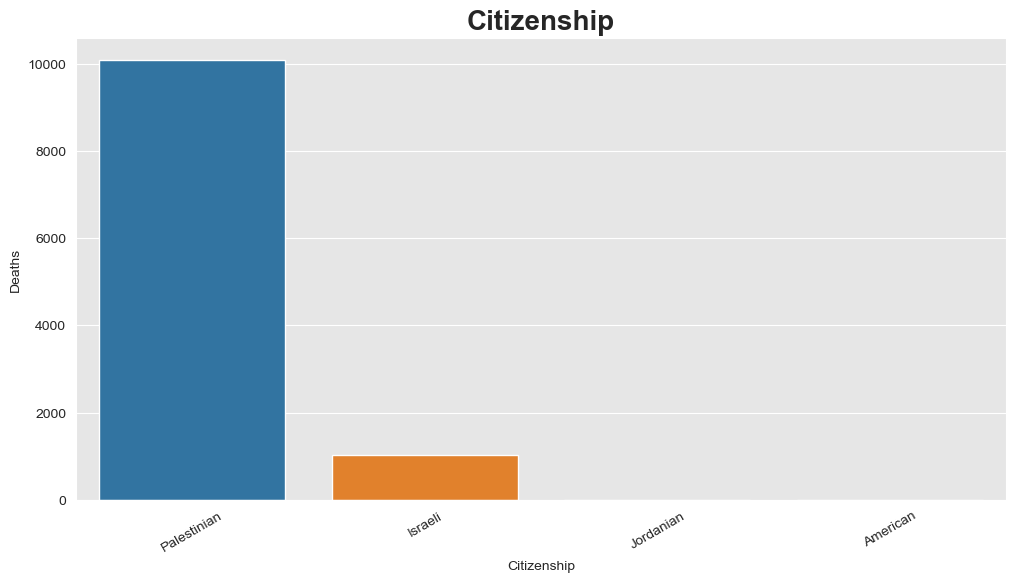

In [41]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

value_counts = df['citizenship'].value_counts(normalize=True).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts.values * len(df), order=value_counts.index)
plt.title("Citizenship", fontsize=20, fontweight='bold')
plt.xlabel("Citizenship")
plt.ylabel("Deaths")
plt.xticks(rotation=30)
plt.show()


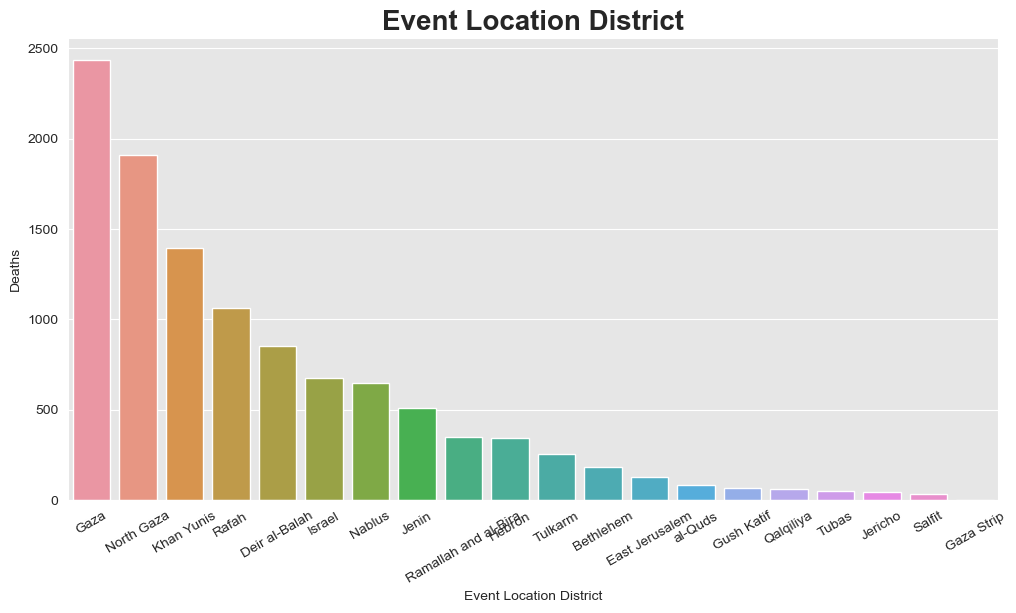

In [42]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

value_counts = df['event_location_district'].value_counts(normalize=True).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts.values * len(df), order=value_counts.index)
plt.title("Event Location District", fontsize=20, fontweight='bold')
plt.xlabel("Event Location District")
plt.ylabel("Deaths")
plt.xticks(rotation=30)
plt.show()


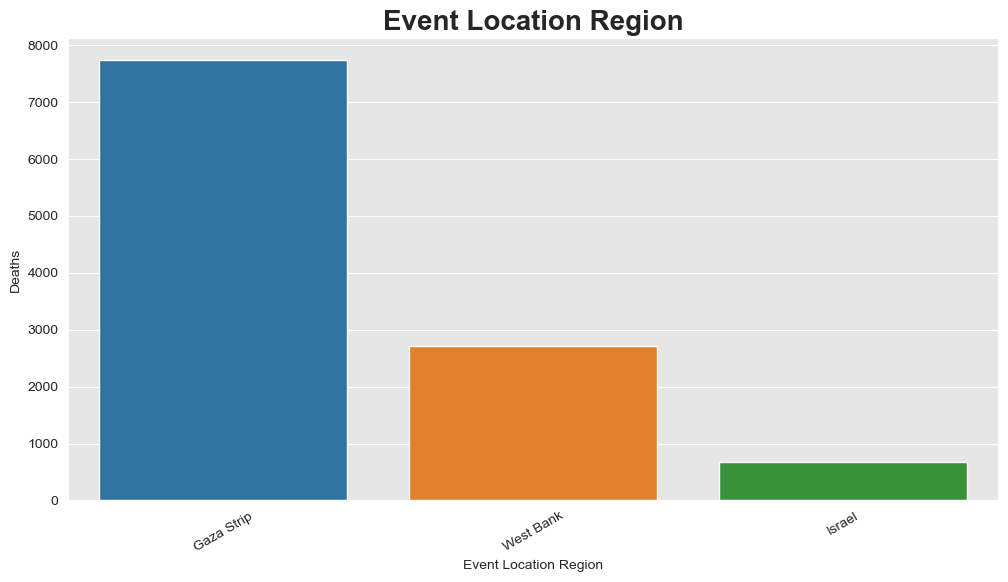

In [43]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

value_counts = df['event_location_region'].value_counts(normalize=True).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts.values * len(df), order=value_counts.index)
plt.title("Event Location Region", fontsize=20, fontweight='bold')
plt.xlabel("Event Location Region")
plt.ylabel("Deaths")
plt.xticks(rotation=30)
plt.show()


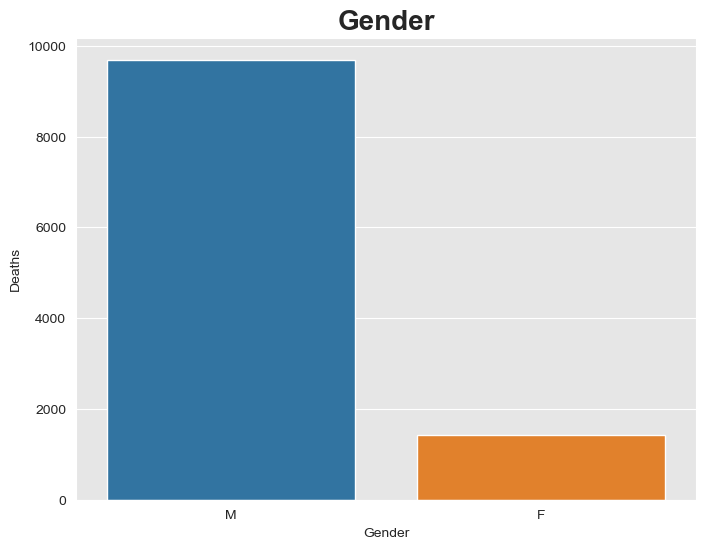

In [105]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

value_counts = df['gender'].value_counts(normalize=True).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values * len(df), order=value_counts.index)
plt.title("Gender", fontsize=20, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Deaths")
plt.show()


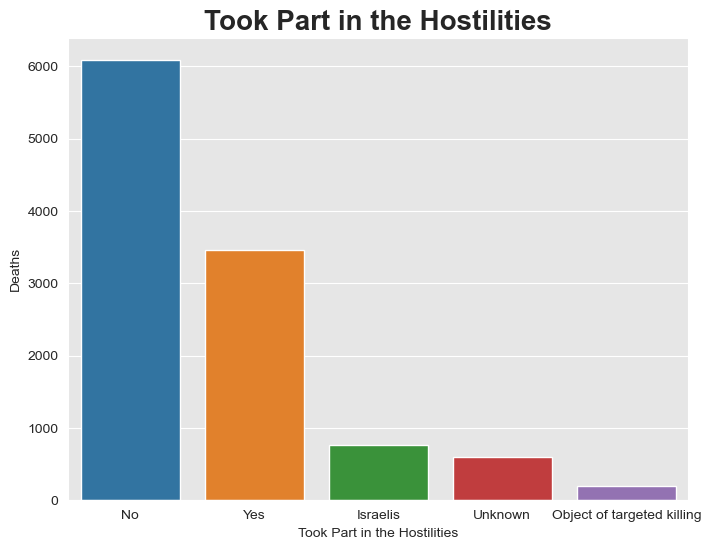

In [106]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

value_counts = df['took_part_in_the_hostilities'].value_counts(normalize=True).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values * len(df), order=value_counts.index)
plt.title("Took Part in the Hostilities", fontsize=20, fontweight='bold')
plt.xlabel("Took Part in the Hostilities")
plt.ylabel("Deaths")
plt.show()


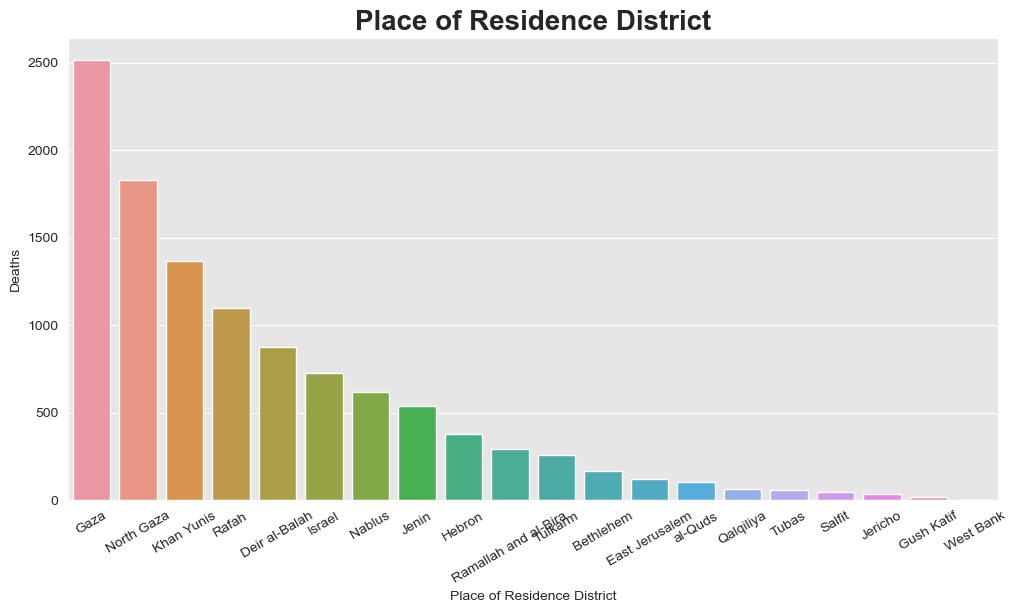

In [107]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

value_counts = df['place_of_residence_district'].value_counts(normalize=True).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts.values * len(df), order=value_counts.index)
plt.title("Place of Residence District", fontsize=20, fontweight='bold')
plt.xlabel("Place of Residence District")
plt.ylabel("Deaths")
plt.xticks(rotation=30)
plt.show()


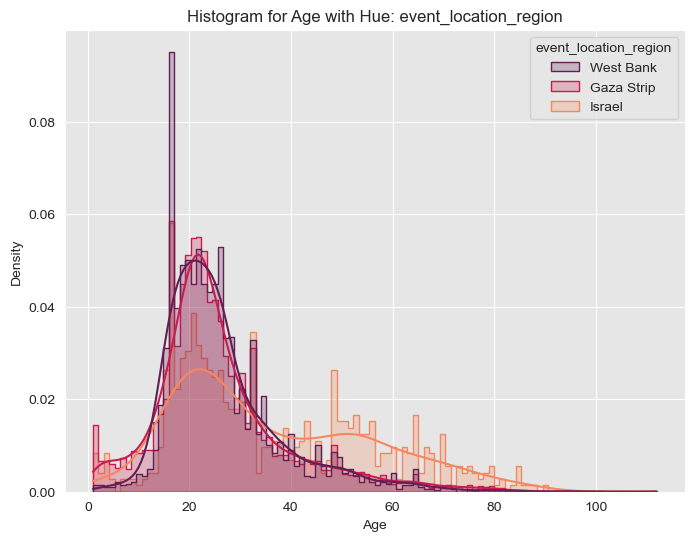

In [108]:
## AGE ANALYSIS
plt.figure(figsize=(8, 6))
sns.histplot(df, x='age', hue='event_location_region', element='step', common_norm=False, stat='density', kde=True, palette="rocket")
plt.title('Histogram for Age with Hue: event_location_region')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()



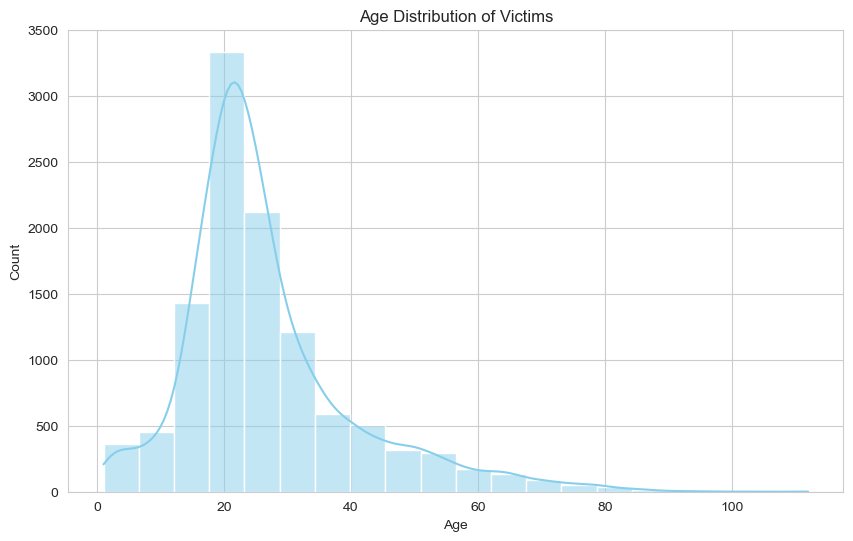

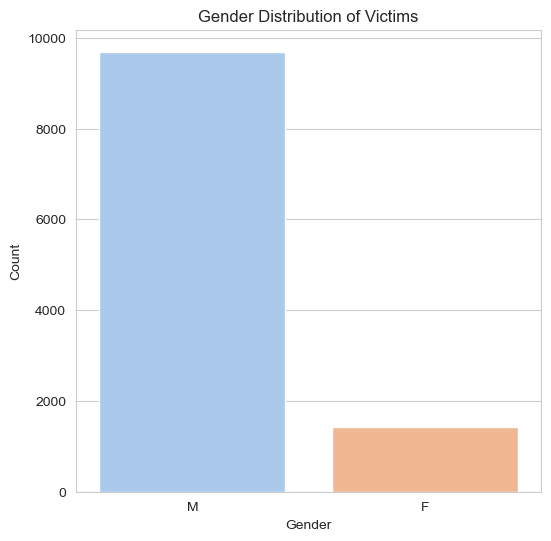

In [109]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Victims')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot gender distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Gender Distribution of Victims')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


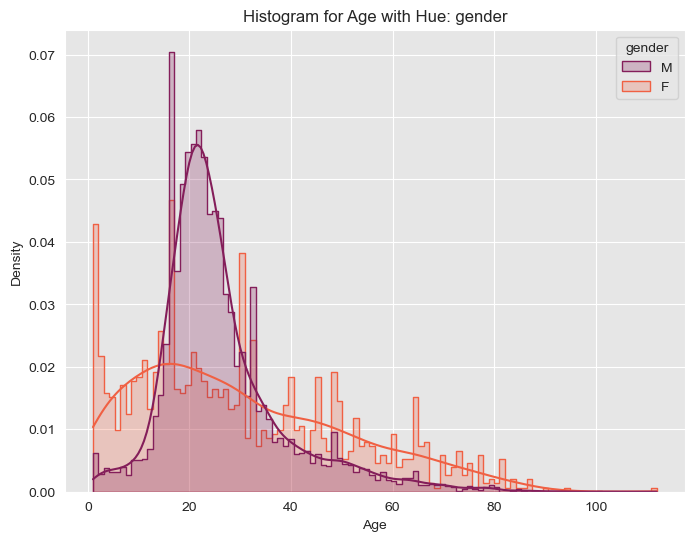

In [81]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='age', hue='gender', element='step', common_norm=False, stat='density', kde=True, palette="rocket")
plt.title('Histogram for Age with Hue: gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


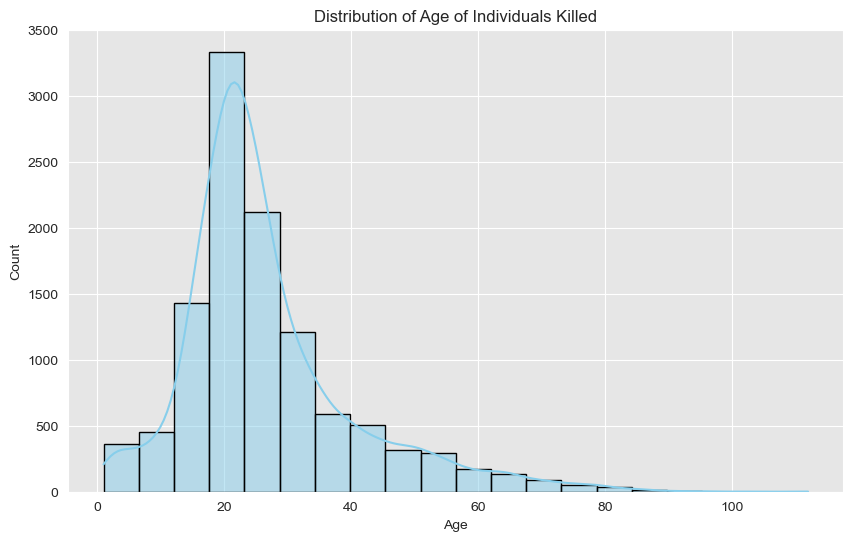

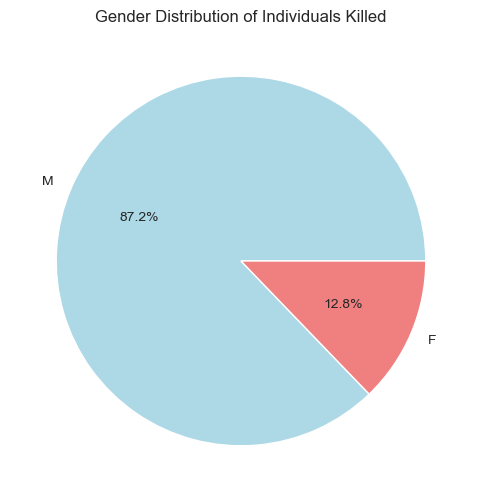

In [82]:
#Sum of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Age of Individuals Killed')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#Gender Distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution of Individuals Killed')
plt.show()


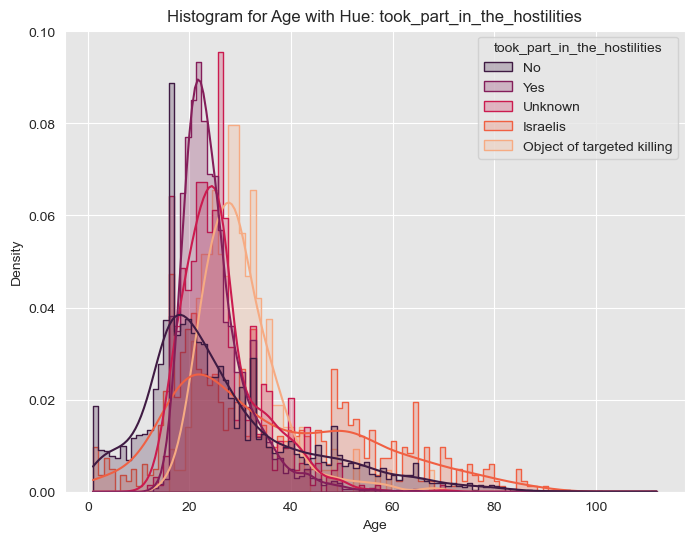

In [83]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='age', hue='took_part_in_the_hostilities', element='step', common_norm=False, stat='density', kde=True, palette="rocket")
plt.title('Histogram for Age with Hue: took_part_in_the_hostilities')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


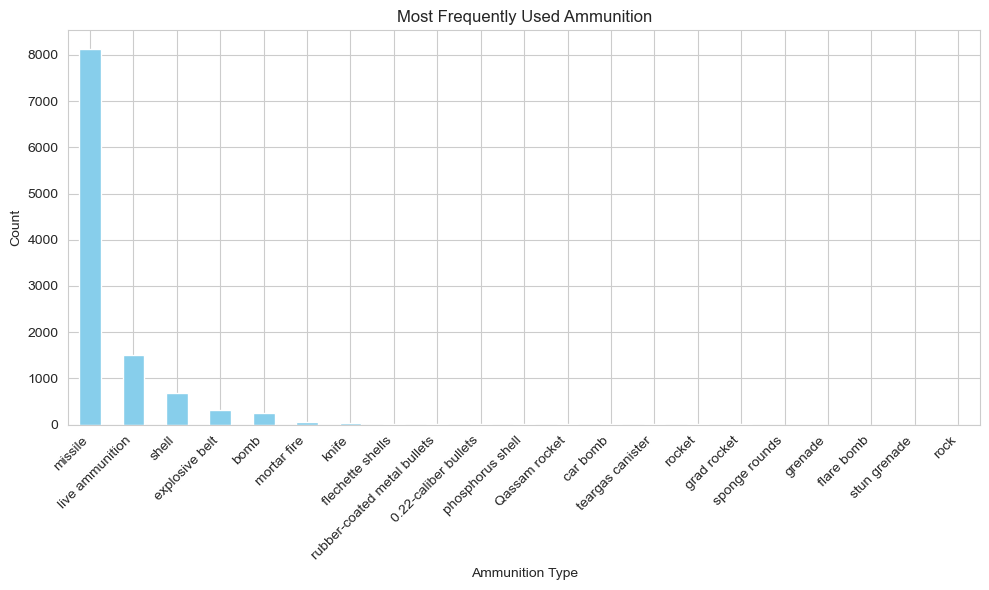

In [110]:
# Calculate the count of each ammunition type
ammunition_counts = df['ammunition'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
ammunition_counts.plot(kind='bar', color='skyblue')
plt.title('Most Frequently Used Ammunition')
plt.xlabel('Ammunition Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

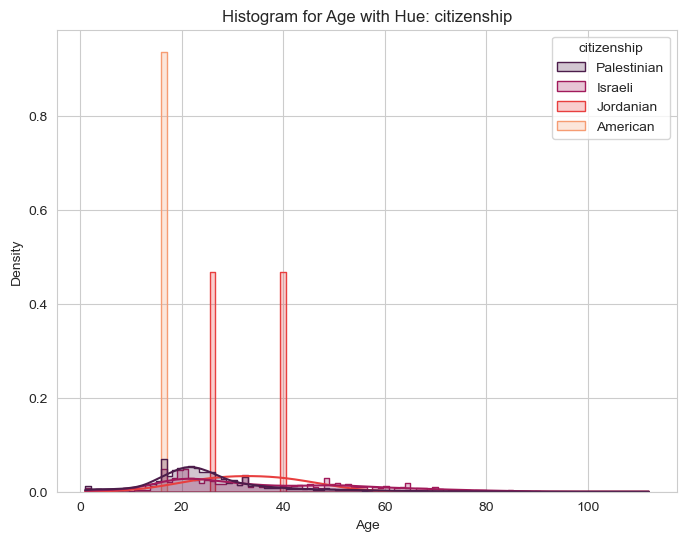

In [111]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='age', hue='citizenship', element='step', common_norm=False, stat='density', kde=True, palette="rocket")
plt.title('Histogram for Age with Hue: citizenship')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


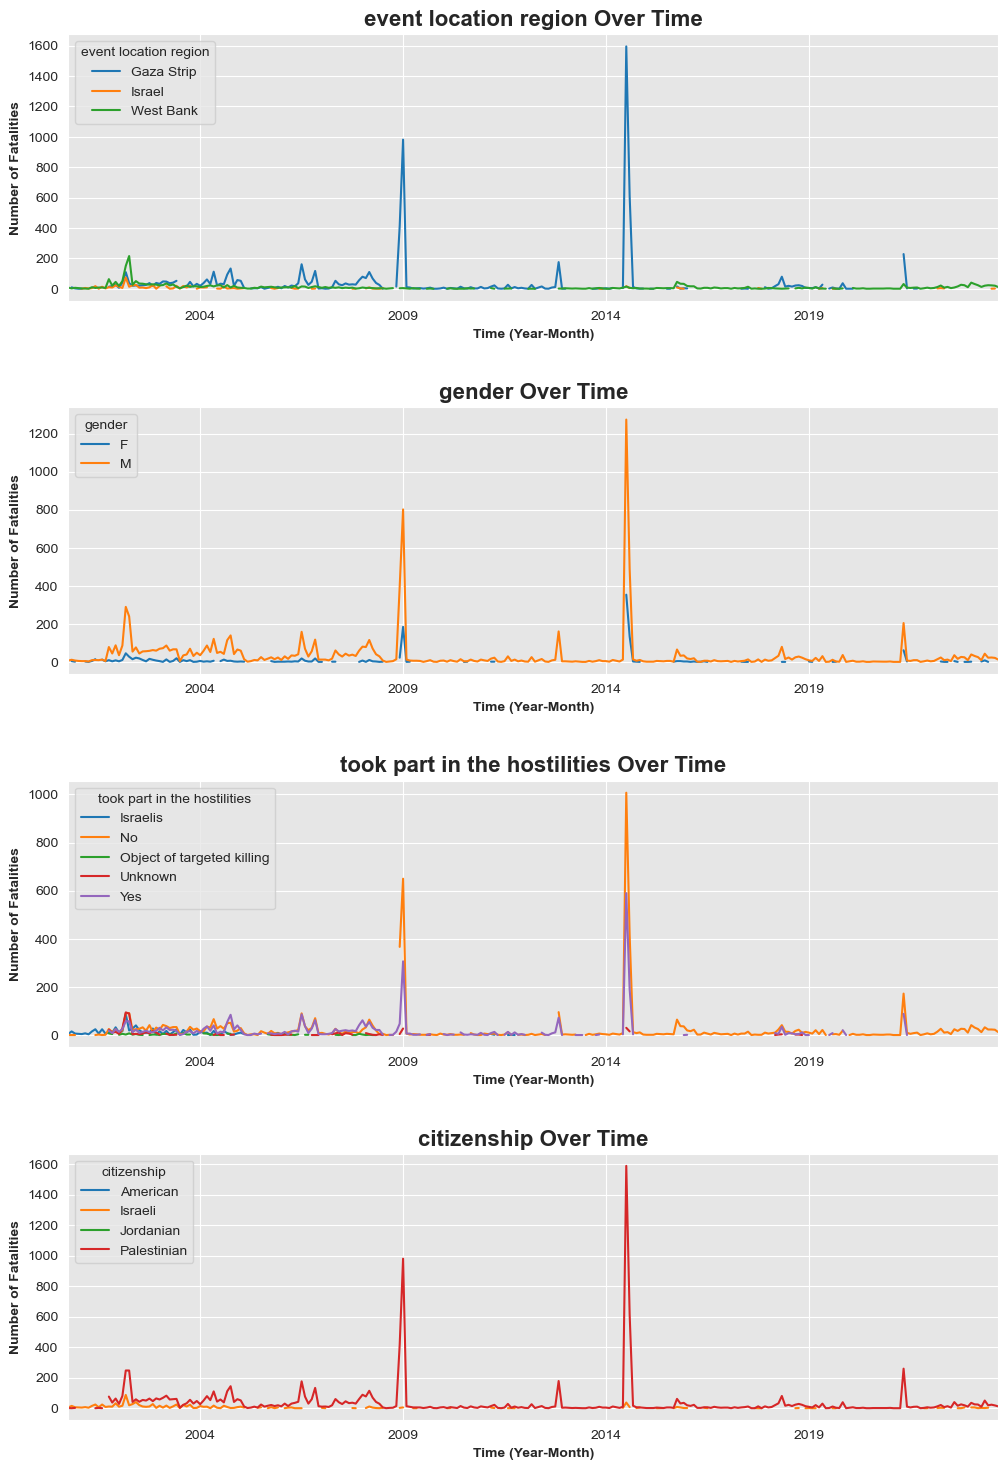

In [85]:
# TIME ANALYSIS
df['date_of_death'] = pd.to_datetime(df['date_of_death'])
fig, ax = plt.subplots(nrows=len(cate_values_age), ncols=1, figsize=(12, 18))
fig.subplots_adjust(hspace=0.4)


for i, col in enumerate(cate_values_age):
    # Group data by 'date_of_event' and the current categorical variable and count the number of fatalities
    time_series = df.groupby([df['date_of_death'].dt.to_period('M'), col])['name'].count().unstack()
    
    # Plot the time series for the current categorical variable
    time_series.plot(kind='line', ax=ax[i])
    
    ax[i].set_title(f'{col.replace("_", " ")} Over Time', fontsize=16, fontweight='bold')
    ax[i].set_xlabel('Time (Year-Month)', fontweight='bold')
    ax[i].set_ylabel('Number of Fatalities', fontweight='bold')
    ax[i].legend(title=col.replace("_", " "), loc='upper left')


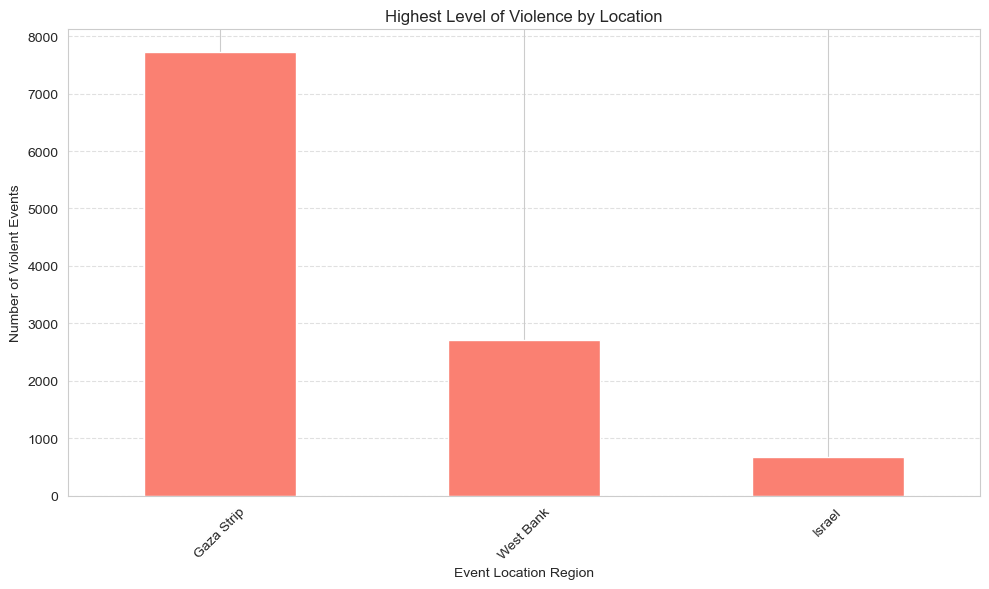

In [112]:
# Group the data by 'event_location_region' and count the occurrences of each region
violence_counts = df.groupby('event_location_region')['event_location'].count().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
violence_counts.plot(kind='bar', color='salmon')
plt.title('Highest Level of Violence by Location')
plt.xlabel('Event Location Region')
plt.ylabel('Number of Violent Events')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for y-axis
plt.tight_layout()
plt.show()


In [44]:
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

# Extract year from the 'date_of_death' column
df['year_of_death'] = df['date_of_death'].dt.year

# Count the number of deaths for each year
death_count_per_year = df['year_of_death'].value_counts().sort_index()

# Display the result
print("Number of Deaths Over the Years:")
print(death_count_per_year)


Number of Deaths Over the Years:
year_of_death
2000      35
2001     345
2002    1323
2003     731
2004     922
2005     240
2006     681
2007     400
2008     900
2009    1059
2010      89
2011     130
2012     262
2013      42
2014    2326
2015     179
2016     116
2017      80
2018     301
2019     146
2020      31
2021     324
2022     205
2023     250
Name: count, dtype: int64


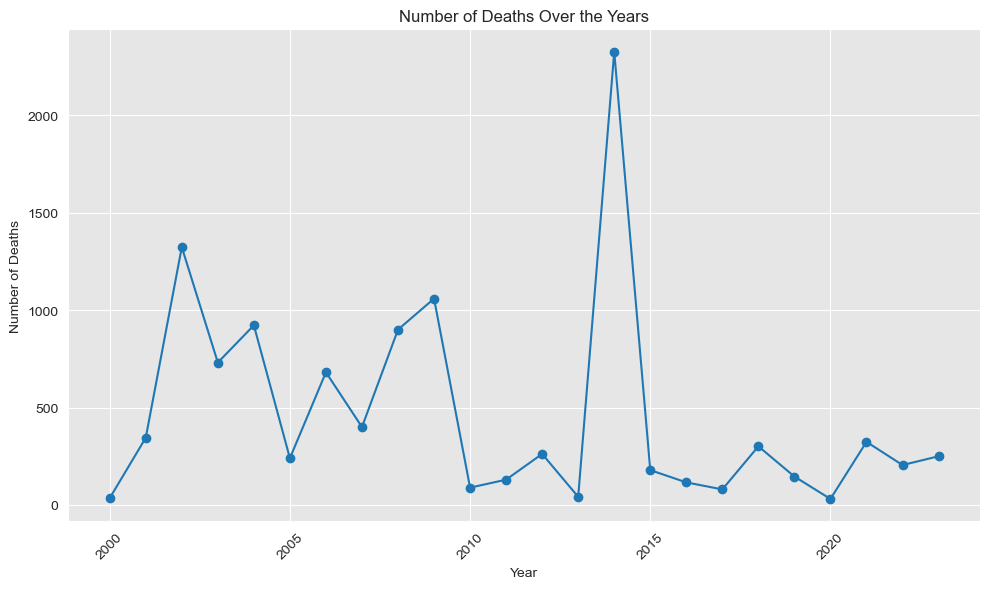

In [45]:
#Number of Deaths
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

# Extract year from the 'date_of_death' column
df['year_of_death'] = df['date_of_death'].dt.year

# Count the number of deaths for each year
death_count_per_year = df['year_of_death'].value_counts().sort_index()

# Create a line plot for number of deaths over the years
plt.figure(figsize=(10, 6))
plt.plot(death_count_per_year.index, death_count_per_year.values, marker='o', linestyle='-')
plt.title('Number of Deaths Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
